<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/World_Happiness_Index_Pandas_%26_Pivot_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://4.bp.blogspot.com/-gbL5nZDkpFQ/XScFYwoTEII/AAAAAAAAAGY/CcVb_HDLwvs2Brv5T4vSsUcz7O4r2Q79ACK4BGAYYCw/s1600/kk3-header00-beta.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#World Happiness Index

**Reference** : https://www.dataquest.io/blog/pandas-pivot-table/

##Getting the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading the data
remoteFile = 'https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/happiness.csv'
data = pd.read_csv(remoteFile, index_col=0)
#diplay first 10 rows
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015
5,Armenia,Central and Eastern Europe,127.0,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015
7,Austria,Western Europe,13.0,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,2015
8,Azerbaijan,Central and Eastern Europe,80.0,5.212,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799,2.00073,2015
9,Bahrain,Middle East and Northern Africa,49.0,5.960,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797,2015


In [3]:
# sort the df by ascending years and descending happiness scores
data.sort_values(['Year', "Happiness Score"], ascending=[True, False], inplace=True)
#diplay first 10 rows
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
46,Finland,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
102,Netherlands,Western Europe,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
140,Sweden,Western Europe,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
103,New Zealand,Australia and New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [5]:
data.shape

(495, 12)

In [10]:
#data.isnull().any().any()
data.isnull().any()

Country                          False
Region                           False
Happiness Rank                    True
Happiness Score                   True
Economy (GDP per Capita)          True
Family                            True
Health (Life Expectancy)          True
Freedom                           True
Trust (Government Corruption)     True
Generosity                        True
Dystopia Residual                 True
Year                             False
dtype: bool

In [15]:
# creating bool series True for NaN values
bool_series = pd.isnull(data["Happiness Rank"])
# filtering data
# displaying data only with Happiness Rank = NaN
#data[bool_series]
data[bool_series].count()

Country                          25
Region                           25
Happiness Rank                    0
Happiness Score                   0
Economy (GDP per Capita)          0
Family                            0
Health (Life Expectancy)          0
Freedom                           0
Trust (Government Corruption)     0
Generosity                        0
Dystopia Residual                 0
Year                             25
dtype: int64

In [16]:
data.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [17]:
pd.pivot_table(data, index= 'Year', values= "Happiness Score")

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [18]:
pd.pivot_table(data, index = 'Region', values="Happiness Score")

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [19]:
pd.pivot_table(data, index = ['Region', 'Year'], values="Happiness Score")

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [20]:
pd.pivot_table(data, index= 'Region', columns='Year', values="Happiness Score")

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


Text(0, 0.5, 'Happiness Rank')

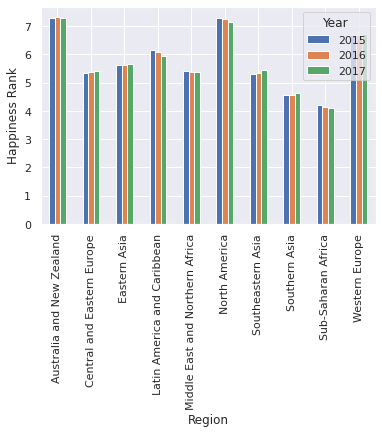

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()
pd.pivot_table(data, index= 'Region', columns= 'Year', values= "Happiness Score").plot(kind= 'bar')
plt.ylabel("Happiness Rank")

In [22]:
pd.pivot_table(data, index= 'Region', values= "Happiness Score", aggfunc= [np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


In [31]:
pd.pivot_table(data, index= 'Region', values= ["Happiness Score", "Freedom"], aggfunc= [np.mean, min, max])

mean                      min  \
                                  Freedom Happiness Score  Freedom   
Region                                                               
Australia and New Zealand        0.609355        7.302500  0.56837   
Central and Eastern Europe       0.335135        5.371184  0.09245   
Eastern Asia                     0.421197        5.632333  0.25168   
Latin America and Caribbean      0.458245        6.069074  0.03037   
Middle East and Northern Africa  0.345383        5.387879  0.00000   
North America                    0.558530        7.227167  0.48163   
Southeastern Asia                0.527108        5.364077  0.39031   
Southern Asia                    0.374111        4.590857  0.10618   
Sub-Saharan Africa               0.345589        4.150957  0.00000   
Western Europe                   0.514213        6.693000  0.05822   

                                                      max                  
                                Happiness Score   Freedom Happiness Score  
Region                                                                     
Australia and New Zealand                 7.284  0.651240           7.334  
Central and Eastern Europe                4.096  0.658249           6.609  
Eastern Asia                              4.874  0.596080           6.422  
Latin America and Caribbean               3.603  0.633760           7.226  
Middle East and Northern Africa           3.006  0.641570           7.278  
North America                             6.993  0.632970           7.427  
Southeastern Asia                         3.819  0.662460           6.798  
Southern Asia                             3.360  0.561213           5.269  
Sub-Saharan Africa                        2.693  0.602127           5.648  
Western Europe                            4.857  0.669730           7.587

In [25]:
data[data['Region'] == 'Australia and New Zealand']

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
103,New Zealand,Australia and New Zealand,9.0,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,2015
268,New Zealand,Australia and New Zealand,8.0,7.334,1.360660,1.172780,0.830960,0.581470,0.419040,0.494010,2.475530,2016
171,Australia,Australia and New Zealand,9.0,7.313,1.444430,1.104760,0.851200,0.568370,0.323310,0.474070,2.546500,2016
433,New Zealand,Australia and New Zealand,8.0,7.314,1.405706,1.548195,0.816760,0.614062,0.382817,0.500005,2.046456,2017
336,Australia,Australia and New Zealand,10.0,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,2.065211,2017


In [26]:
pd.pivot_table(data, index = 'Region', values="Happiness Score", aggfunc= [np.mean, min, max, np.std, lambda x: x.count()/3])

,mean,min,max,std,<lambda>
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.284,7.334,0.020936,2.000000
Central and Eastern Europe,5.371184,4.096,6.609,0.578274,29.000000
Eastern Asia,5.632333,4.874,6.422,0.502100,6.000000
Latin America and Caribbean,6.069074,3.603,7.226,0.728157,22.666667
Middle East and Northern Africa,5.387879,3.006,7.278,1.031656,19.333333
North America,7.227167,6.993,7.427,0.179331,2.000000
Southeastern Asia,5.364077,3.819,6.798,0.882637,8.666667
Southern Asia,4.590857,3.360,5.269,0.535978,7.000000


In [28]:
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)
pd.pivot_table(data, index = 'Region', values="Happiness Score", aggfunc= [np.mean, remove_outliers, lambda x: x.count()/3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.000000
Central and Eastern Europe,5.371184,5.449250,29.000000
Eastern Asia,5.632333,5.610125,6.000000
Latin America and Caribbean,6.069074,6.192750,22.666667
Middle East and Northern Africa,5.387879,5.508500,19.333333
North America,7.227167,7.244875,2.000000
Southeastern Asia,5.364077,5.470125,8.666667
Southern Asia,4.590857,4.707500,7.000000


In [32]:
table = pd.pivot_table(data, index = 'Region', values="Happiness Score", aggfunc= [np.mean, remove_outliers])
table[table.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [33]:
table[table.index.str.contains('Europe')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


In [34]:
table = pd.pivot_table(data, index = ['Region', 'Year'], values='Happiness Score',aggfunc= [np.mean, remove_outliers])
table.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

In [37]:
score = pd.qcut(data["Happiness Score"], 4)
score

141    (6.234, 7.587]
60     (6.234, 7.587]
38     (6.234, 7.587]
108    (6.234, 7.587]
25     (6.234, 7.587]
            ...      
448               NaN
461               NaN
468               NaN
469               NaN
473               NaN
Name: Happiness Score, Length: 495, dtype: category
Categories (4, interval[float64, right]): [(2.692, 4.509] < (4.509, 5.283] < (5.283, 6.234] <
                                           (6.234, 7.587]]

In [39]:
pd.pivot_table(data, index= ['Region', score], values= "Happiness Score", aggfunc= 'count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.509]                 0
                                (4.509, 5.283]                 0
                                (5.283, 6.234]                 0
                                (6.234, 7.587]                 6
Central and Eastern Europe      (2.692, 4.509]                10
                                (4.509, 5.283]                28
                                (5.283, 6.234]                46
                                (6.234, 7.587]                 3
Eastern Asia                    (2.692, 4.509]                 0
                                (4.509, 5.283]                 6
                                (5.283, 6.234]                 9
                                (6.234, 7.587]                 3
Latin America and Caribbean     (2.692, 4.509]                 2
                                (4.509, 5.283]                 8
                                (5.283, 6.234]                28
                                (6.234, 7.587]                30
Middle East and Northern Africa (2.692, 4.509]                 9
                                (4.509, 5.283]                19
                                (5.283, 6.234]                14
                                (6.234, 7.587]                16
North America                   (2.692, 4.509]                 0
                                (4.509, 5.283]                 0
                                (5.283, 6.234]                 0
                                (6.234, 7.587]                 6
Southeastern Asia               (2.692, 4.509]                 5
                                (4.509, 5.283]                 8
                                (5.283, 6.234]                 7
                                (6.234, 7.587]                 6
Southern Asia                   (2.692, 4.509]                 8
                                (4.509, 5.283]                13
                                (5.283, 6.234]                 0
                                (6.234, 7.587]                 0
Sub-Saharan Africa              (2.692, 4.509]                84
                                (4.509, 5.283]                29
                                (5.283, 6.234]                 4
                                (6.234, 7.587]                 0
Western Europe                  (2.692, 4.509]                 0
                                (4.509, 5.283]                 6
                                (5.283, 6.234]                 9
                                (6.234, 7.587]                48

In [40]:
# creating a pivot table and only displaying the first 9 values
pd.pivot_table(data, index= ['Region', score], values= "Happiness Score", aggfunc= 'count', fill_value= 0, margins = True, margins_name= 'Total count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.509]                 0
                                (4.509, 5.283]                 0
                                (5.283, 6.234]                 0
                                (6.234, 7.587]                 6
Central and Eastern Europe      (2.692, 4.509]                10
                                (4.509, 5.283]                28
                                (5.283, 6.234]                46
                                (6.234, 7.587]                 3
Eastern Asia                    (2.692, 4.509]                 0
                                (4.509, 5.283]                 6
                                (5.283, 6.234]                 9
                                (6.234, 7.587]                 3
Latin America and Caribbean     (2.692, 4.509]                 2
                                (4.509, 5.283]                 8
                                (5.283, 6.234]                28
                                (6.234, 7.587]                30
Middle East and Northern Africa (2.692, 4.509]                 9
                                (4.509, 5.283]                19
                                (5.283, 6.234]                14
                                (6.234, 7.587]                16
North America                   (2.692, 4.509]                 0
                                (4.509, 5.283]                 0
                                (5.283, 6.234]                 0
                                (6.234, 7.587]                 6
Southeastern Asia               (2.692, 4.509]                 5
                                (4.509, 5.283]                 8
                                (5.283, 6.234]                 7
                                (6.234, 7.587]                 6
Southern Asia                   (2.692, 4.509]                 8
                                (4.509, 5.283]                13
                                (5.283, 6.234]                 0
                                (6.234, 7.587]                 0
Sub-Saharan Africa              (2.692, 4.509]                84
                                (4.509, 5.283]                29
                                (5.283, 6.234]                 4
                                (6.234, 7.587]                 0
Western Europe                  (2.692, 4.509]                 0
                                (4.509, 5.283]                 6
                                (5.283, 6.234]                 9
                                (6.234, 7.587]                48
Total count                                                  470

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEg8qElM73l6qtmIS1VTUgsLLhyoGnbWGDq8g-v-g2iW1xr-IRr7FT9WW4tnKDY2sE1rJKPl7sp_p_f6ipEs-__eYU7V0SRuoLlhkopL063bEPqUTiC4lrM4toFMgaf7kpxE2m5niHwn7jZwb9ktv8OdO7OIwPL9xyyF-SiSuQE2SRemLVQRCalwDnQgdg/s16000/CTCYFooter-1.png)